# COGS 108 - Final Project 

# Overview

I chose to analyze the targeted age demographic in recreation centers through analysis of the types of centers and facilities provided at recreation centers in San Diego. Through the use of box plots, I was able to analyze the amount of adult, teenage, and toddler centers provided at recreation centers. I came to the conclusion that teenagers are the targeted demographic, because there are more centers aimed towards their age demographic.

# Name & GitHub ID

- Name: Jake Gonzalez
- GitHub Username: justjake12

# Research Question

To what extent do recreational centers cater towards varying age demographics (i.e. adults, teens, and children) through their provided activities and facilities, specifically centers geared toward the demographic?

## Background and Prior Work

I am interested in understanding and analyzing the relation between the popularity / amount of traffic to a park and the activities / attributes of said park in order to compare with what attractions San Diego parks have to offer. There is quite a bit of research on the attraction to parks and the visitation to parks, whether it be analyzing socioeconomic aspects or the amount of phsyical activity performed at the park. In an article titled ""How Can Neighborhood Parks Attract More Users?", Cohen and Leuschner explain how the RAND Coporation had conducted the first national study of parks in neighborhoods that was sponsered by the National Heart, Lung, and Blood Institue of the National Institues of Health. The main goal of the study was to understand the social demogrpahics of neighborhood parks and which attributes of parks are people utilizing for physical acitivity. While I don't believe I will focus on the centers surrounding the adults, teens, or toddlers, this article provides some statistics on certain areas of interest: "the vast majority of parks have lawns (97 percent) and play areas (89 percent). Nearly half the parks have outdoor basketball courts (53 percent) and baseball fields (49 percent), 31 percent have tennis courts, and 29 percent have a walking path or loop. The number of facilities was related to the number of users such that each additional facility (basketball court, tennis court, play area, etc.) was associated with a 2 percent increase in the number of park users and a 2 percent increase in physical activity in the park, compared to the average park" (Cohen). They found that there were certain disparities amongst the number of people that visited certain parks with certain features as opposed to parks with less features. 
    In another article, "29: Number of Times Americans Visit Their Local Parks Anually" by Daniel Espada, the America's Engagement with Parks's annual survey analyzed how Americans are visiting and interacting with their neighborhood parks and the facilities offered. This article offers some information on the demogrpahics of who is going to parks and for what reasons, as well as reasons they do not go to parks. Some of the people using the parks the most are "Millennials, those that identify themselves as Hispanic, and parents of children are more frequent visitors to parks and recreation facilities. At the other end of the spectrum, Baby Boomers make far less frequent visits to their local parks" (Espada). This may offer me some information that may guide me in analyzing data sets that show who are going to parks in San Diego and if we can gear activities towards certain age groups and if we can try and brainstorm activities and attractions for people who are not visiting the park as much. 

References (include links):
1) "How Can Neighborhood Parks Attract More Users?" by Deborah A. Cohen & Kristin Leuschner : https://www.nrpa.org/parks-recreation-magazine/2017/july/how-can-neighborhood-parks-attract-more-users/
2) "29: Number of Times Americans Visit Their Local Parks Anually" by Daniel Espada : https://www.nrpa.org/blog/29-number-of-times-americans-visit-their-local-parks-annually/

# Hypothesis


I believe recreational centers will tend to cater more towards the teenage demographic through their provided facilities, because the teenage demographic are more likely to spend their time playing games or doing sports. I predict the facilites geared toward adults and younger children will be less frequent at recreational centers, because younger children are not often left unsupervised and adults are not as willing to play sports or do activities in the presence of a younger crowd.

# Dataset(s)

- Dataset Name: 'rec_centers_datasd.geojson'
- Link to the dataset: https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/rec_centers_datasd.geojson
- Number of observations: There are 57 observations / recreational centers that were observed across 29 columns.

This dataset includes the address and name of each recreation center in San Diego, along with the community it is located in. The dataset also includes the ammenities and facilities that are provided at each recreation center. This dataset also provides geometric and historic (year built) information on each recreation center.

# Setup

In [52]:
#Imports
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#Import data of location of rec centers
rec = gpd.read_file('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/rec_centers_datasd.geojson')
rec.shape

(57, 29)

# Data Cleaning

In order to clean the data, I first read through the columns, and decided which were of little importance to my prompt. I was not interested in the specfics of each park (such as address or the year it was built), nor was I interested in the sq ft of the park. After dropping off columns, I sorted the columns in a way where it was easier to digest when looking at the dataframe, so I wouldn't have to keep scrolling between different ends of the dataframe. I then put the rows in descending order by their serv_dist, so like rows were grouped together. Finally, I reset the index, so it was in order with the new order of rows, and I dropped the two columns that did not have a number for their serv_dist, because I wanted to keep the serv_dist grouped together, and if they lacked one then it was of little importance to my analysis.

In [54]:
#Cleaning rec df by dropping columns of little importance to prompt
rec = rec.drop(labels=['address', 'zip', 'sq_ft', 'year_built', 'kitchen', 'current_cd', 'fy13_cd', 'facility_n', 'thomas_bro', 'geometry', 'comfort_st', 'objectid'], axis=1)

In [55]:
#Sorting the rows in descending orders in order to group by serv_dist column & re-order column to group like data
rec_sorted = rec[['serv_dist', 'rec_bldg', 'park_name', 'community', 'adult_ctr', 'teen_ctr', 'tinytot_rm', 'comp_rm', 'dance_rm', 'game_rm', 'gymnasium', 'kiln', 'kiln_rm', 'multp_rm', 'racqb_ct', 'stage', 'weight_rm']]
sorted_rec = rec_sorted.sort_values(by=['serv_dist'])

#Resetting index to fit new arrangement of rows
sorted_rec = sorted_rec.reset_index(drop=True)

#Dropping last 2 rows of df b/c don't coincide with service district
rec_clean = sorted_rec.drop(sorted_rec[sorted_rec['serv_dist'] == 'DRP'].index)

# Data Analysis & Results

In order to view the which demographic was favored, I decided to to plot each type of center -- adult, teen, and tiny tot -- in order to compare which demographic had more centers dedicated to them. I chose to use barplots to plot each variable, because each is a categorical variable, and I wanted to be able to visualize the numerical value of each type of center by visually looking at the height of the bar. 

I found that teen centers were the most common type of center present in the recreational centers, followed by tiny tot centers, which were closely followed by adult centers. Although, the majority of recreational centers have none of the 3, it is clear which demographic is favored when it comes to centers based on their age.

Text(0.5,0,'Adult Center')

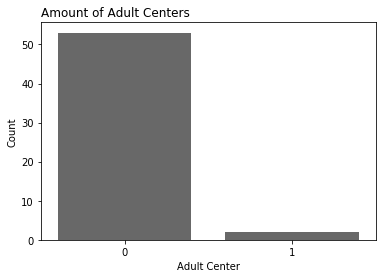

In [56]:
#Plotting the amount of Adult Centers vs Non-Adult Centers
plot_1 = sns.countplot(x='adult_ctr', data=rec_clean, color='#686868')

# add title and axis labels (modify x-axis label)
plot_1.set_title('Amount of Adult Centers', loc='left')
plot_1.set_ylabel('Count') 
plot_1.set_xlabel('Adult Center')

Text(0.5,0,'Teen Center')

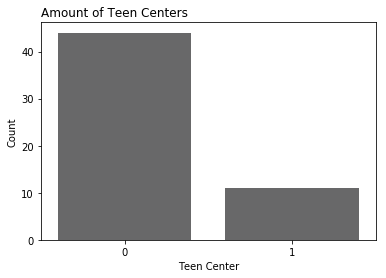

In [57]:
#Plotting amount of Teen Centers vs Non-Teen Centers
plot_2 = sns.countplot(x='teen_ctr', data=rec_clean, color='#686869')

# add title and axis labels (modify x-axis label)
plot_2.set_title('Amount of Teen Centers', loc='left')
plot_2.set_ylabel('Count') 
plot_2.set_xlabel('Teen Center')

Text(0.5,0,'Toddler Center')

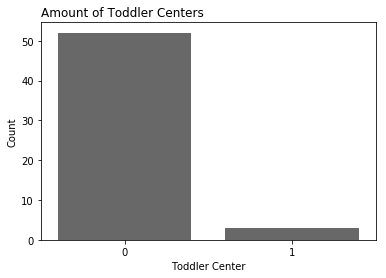

In [58]:
#Plotting amount of Tiny Tot rooms vs Non-Tiny Tot Rooms
plot_3 = sns.countplot(x='tinytot_rm', data=rec_clean, color='#686868')

# add title and axis labels (modify x-axis label)
plot_3.set_title('Amount of Toddler Centers', loc='left')
plot_3.set_ylabel('Count') 
plot_3.set_xlabel('Toddler Center')

# Ethics & Privacy

I assume I had permission to use the data provided for the purpose of this project analysis, since the dataset was provided by Professor Ellis. There is no personal information that was provided in this particular dataset, so there is no privacy concerns regarding this data. Since the data is the amount of a particular facility that is either present or not at a recereational center, there is no bias that I can think of. The only bias I could imagine is if the collector of this data excluded any recreational centers that were not as prestigous or were located in a lower income area; however, I did not find evidence of that taking place in this data set. 

# Conclusion & Discussion

The data I chose to use and analyze were the number of each facility that was provided at each recreation center, focusing on the specific center geared toward a specific age demographic. I was curious in finding out which age demographic was favored when it came to the provided amenities and facilities at San Diego recreation centers; my hypothesis was correct that the targeted demographic when it comes to facilities and centers provided is the teenage demographic. I chose to simply analyze the frequency at which each type of center (adult, teen, and tiny tot) was present or absent at the recreation centers. This analysis was carried out through box plots in order to visualize the presence and absence of each, and to be able to easily compare each center with the others.

Through my analysis, I found that the teenage demographic tended to be favored when it came to the centers present at recreation centers; on the opposite end, I found that the adult demographic tended to be less favored when it came to the centers provided. I conclude that the teenage demographic is favored, because recreation centers tend to be geared towards sports or after school activities, and teenagers are more often left with free time to do sports or engage in activities with friends without supervision of parents.

A few limitations come to mind when thinking about this project. One being the absence of actual age data -- or mean age -- of frequent visitors to each recreation center, because with this data, it would solidify the fact that teenagers are the more popular and targeted demographic. Instead, this is assumed through the physical facilities offered, some of which may go untouched by the targeted age group. Another limitation of this project was more personal, because due to family issues (posted on Piazza for further clarification) I was not able to commit to this project whole heartedly. I believe that this work may impact society, because physical activity is vital when it comes to health, so if there were more centers that were geared toward a wider range of ages, then the recreation centers may see an influx of traffic. If the park is not able to have all three types of centers, then they should focus on one consolidatd center with a variety of activities that any age demographic could engage in and enjoy.